In [1]:
%load_ext autoreload
%autoreload 2

In [22]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from flax import linen as nn
import jax
from jax import numpy as np, random
import optax
from rbf_layer import RBFLayer
from framework import test_model
import matplotlib.pyplot as plt

In [3]:
dataset = datasets.fetch_california_housing()

In [4]:
print(dataset['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
print(dataset.data.shape)

(20640, 8)


In [6]:
print(dataset.data[0])

[   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]


In [7]:
X = StandardScaler().fit_transform(dataset.data)
y = StandardScaler().fit_transform(dataset.target[:, None])[:, 0]
print(X.shape, y.shape)

(20640, 8) (20640,)


In [8]:
print(X[0], y[:8])

[ 2.34476576  0.98214266  0.62855945 -0.15375759 -0.9744286  -0.04959654
  1.05254828 -1.32783522] [2.12963148 1.31415614 1.25869341 1.16510007 1.17289952 0.54461086
 0.80025935 0.29936163]


In [9]:
print(dataset.data[0], dataset.target[:8])

[   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ] [4.526 3.585 3.521 3.413 3.422 2.697 2.992 2.414]


In [10]:
for array in (*list(X.T), y):
    print(np.mean(array), np.std(array))

-5.9142593e-09 1.0
-4.4356945e-09 1.0
-1.4785648e-09 1.0
-1.4785648e-09 1.0
-2.5874884e-09 1.0
7.392824e-10 1.0
-4.4356945e-09 1.0
1.848206e-09 1.0
-3.696412e-09 1.0


parameter count: 672


iteration 515: train_loss:  4.44e-01, val_loss:  4.63e-01: : 516it [00:31, 16.22it/s]
iteration 515: train_loss:  6.96e-01, val_loss:  3.72e-01: : 516it [00:28, 18.22it/s]
iteration 515: train_loss:  1.89e-01, val_loss:  3.24e-01: : 516it [00:28, 18.21it/s]
iteration 515: train_loss:  1.96e-01, val_loss:  3.00e-01: : 516it [00:28, 18.15it/s]
iteration 515: train_loss:  5.35e-01, val_loss:  2.82e-01: : 516it [00:29, 17.65it/s]
iteration 515: train_loss:  4.58e-01, val_loss:  2.73e-01: : 516it [00:28, 17.97it/s]
iteration 515: train_loss:  2.41e-01, val_loss:  2.69e-01: : 516it [00:28, 18.30it/s]
iteration 515: train_loss:  1.20e-01, val_loss:  2.61e-01: : 516it [00:28, 18.16it/s]
iteration 515: train_loss:  2.73e-01, val_loss:  2.66e-01: : 516it [00:28, 17.80it/s]
iteration 515: train_loss:  2.41e-01, val_loss:  2.58e-01: : 516it [00:29, 17.73it/s]
epoch 9: val_loss:  2.66e-01: 100%|██████████| 10/10 [04:50<00:00, 29.03s/it]


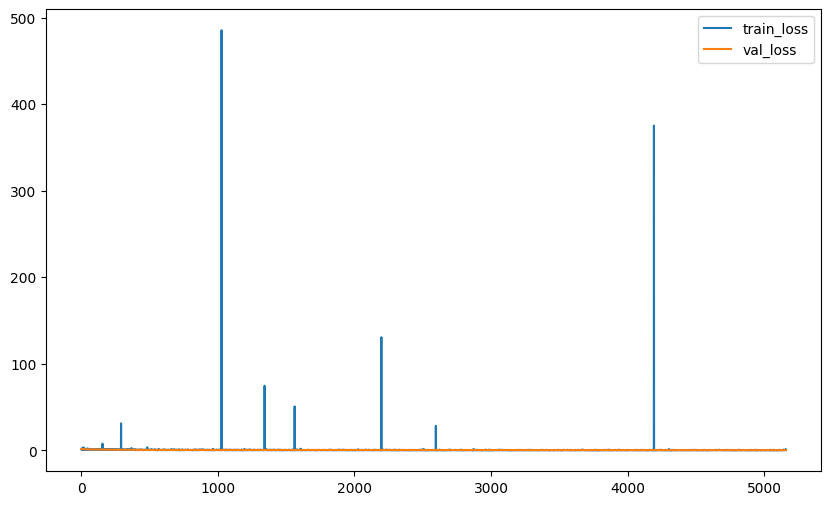

In [46]:
history = test_model(
    model=nn.Sequential((
        RBFLayer(16, 2),
        RBFLayer(16, 2),
        RBFLayer(16, 1)
    )),
    X=X, y=y,
    loss_fn=lambda x, y: (x - y) ** 2, need_vmap=True,
    optimizer=optax.adam(1e-3),
    num_epochs=10, batch_size=32
)


In [47]:
print(min(history['val_loss']))

0.25759485363960266


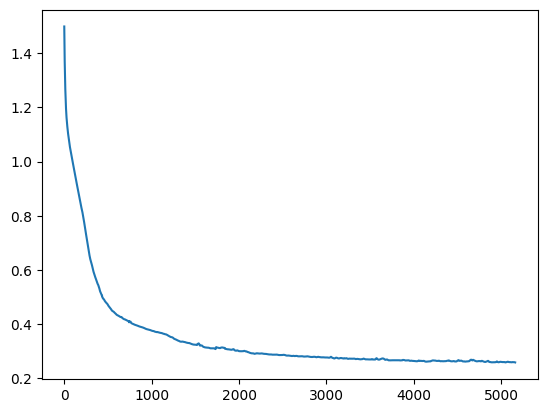

In [48]:
plt.plot(range(len(history['val_loss'])), history['val_loss'])

parameter count: 1033


iteration 515: train_loss:  2.29e-01, val_loss:  3.58e-01: : 516it [00:05, 90.99it/s]
iteration 515: train_loss:  1.34e-01, val_loss:  3.26e-01: : 516it [00:05, 92.95it/s]
iteration 515: train_loss:  6.52e-01, val_loss:  3.04e-01: : 516it [00:05, 95.23it/s]
iteration 515: train_loss:  2.36e-01, val_loss:  2.86e-01: : 516it [00:05, 97.40it/s]
iteration 515: train_loss:  5.03e-01, val_loss:  2.80e-01: : 516it [00:05, 96.99it/s]
iteration 515: train_loss:  2.30e-01, val_loss:  2.79e-01: : 516it [00:05, 95.95it/s]
iteration 515: train_loss:  3.18e-01, val_loss:  2.70e-01: : 516it [00:05, 95.93it/s]
iteration 515: train_loss:  2.21e-01, val_loss:  2.63e-01: : 516it [00:05, 91.80it/s]
iteration 515: train_loss:  3.35e-01, val_loss:  2.68e-01: : 516it [00:05, 90.96it/s]
iteration 515: train_loss:  1.37e-01, val_loss:  2.65e-01: : 516it [00:05, 89.08it/s]
epoch 9: val_loss:  2.68e-01: 100%|██████████| 10/10 [00:55<00:00,  5.52s/it]


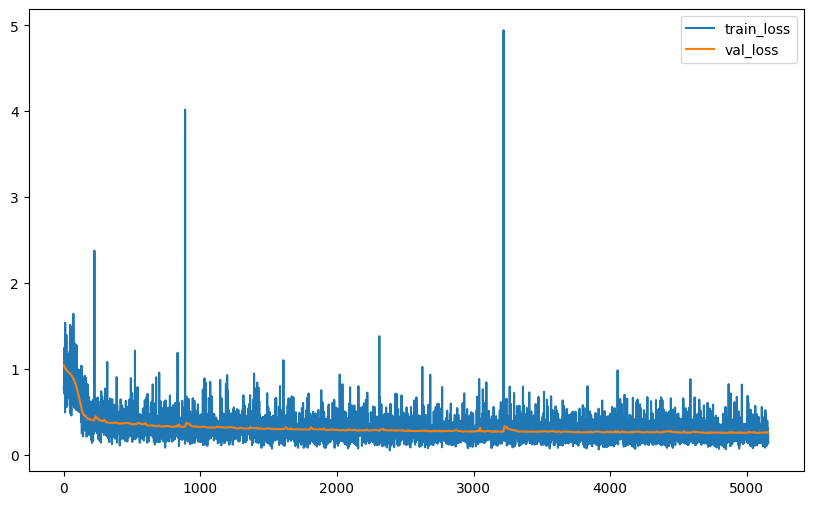

In [50]:
history = test_model(
    model=nn.Sequential((
        nn.Dense(8),
        nn.relu,
        nn.Dense(16),
        nn.relu,
        nn.Dense(32),
        nn.relu,
        nn.Dense(8),
        nn.relu,
        nn.Dense(1)
    )),
    X=X, y=y,
    loss_fn=lambda x, y: (x - y) ** 2, need_vmap=True,
    optimizer=optax.adam(1e-3),
    num_epochs=10, batch_size=32
)


In [51]:
print(min(history['val_loss']))

0.25659510493278503


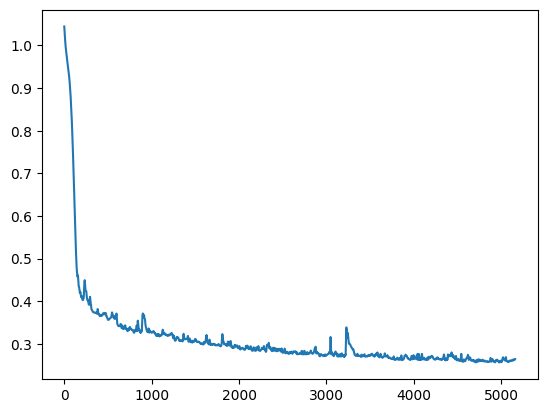

In [52]:
plt.plot(range(len(history['val_loss'])), history['val_loss'])